In [164]:
import networkx as nx
import matplotlib.pyplot as plt
import json
import numpy as np
import itertools

First, we are going to generate complete graph data with random position and weights to test our algorithms onto.

In [165]:
# Function to generate a complete graph with random weights
def generate_point_graph_with_weights(n,weight_range):
      # Create a complete graph with n nodes
      np.random.seed(421)  # Seed for reproducibility
      point_graph = nx.Graph()
      first_iteration = True
      for node in range(n):
            positions = (np.random.uniform(), np.random.uniform())
            if first_iteration:
                  positions = (0.5,0.5) #we want the first node to be in the center
                  first_iteration = False
            point_graph.add_node(node, pos=positions,weight=np.random.randint(1, 100))
      return point_graph

In [166]:
# Parameters
n = 10  # Number of nodes
weight_range = 10  # highest value the weight can go

# Generate graphs
point_graph = generate_point_graph_with_weights(n,weight_range)

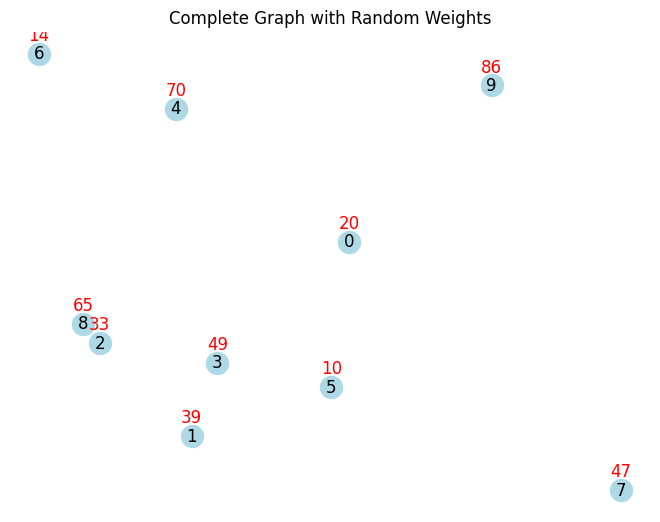

In [172]:
# Drawing the graph
positions = nx.get_node_attributes(point_graph, 'pos')
nx.draw(point_graph, positions, with_labels=True, node_color='lightblue', edge_color='#909090', node_size=250) # drawing nodes
label_pos = {node: (position[0], position[1] + 0.03) for node, position in positions.items()}  # Adjust 0.1 as needed
labels = {node: point_graph.nodes[node]['weight'] for node in point_graph.nodes()}
nx.draw_networkx_labels(point_graph, label_pos, labels=labels, font_size=12, font_color='red')

# Show the graph
plt.title('Complete Graph with Random Weights')
plt.show()

In [ ]:
for node, attrs in point_graph.nodes(data=True):
    print(f"Node {node} has a weight of {attrs['weight']} at position {attrs['pos']}")
node_connection_info = []

Node 0 has a weight of 20 at position (0.5, 0.5)
Node 1 has a weight of 39 at position (0.25452875337360326, 0.18006962688656314)
Node 2 has a weight of 33 at position (0.11106872140751178, 0.332953795313925)
Node 3 has a weight of 49 at position (0.29464930599464756, 0.3011811757824341)
Node 4 has a weight of 70 at position (0.229964523578139, 0.718716448079359)
Node 5 has a weight of 10 at position (0.47257693058574424, 0.2605575521263882)
Node 6 has a weight of 14 at position (0.016633181418733156, 0.8090105919464768)
Node 7 has a weight of 47 at position (0.9242314641967556, 0.0914330550434751)
Node 8 has a weight of 65 at position (0.08559981416410789, 0.3654722560343914)
Node 9 has a weight of 86 at position (0.7224719330530441, 0.756960454894659)
